In [1]:
import numpy as np
import pandas as pd

In [1]:
from IPython.display import Image
Image(url='https://res.cloudinary.com/dtpgi0zck/image/upload/s--PJHbBAbR--/c_fit,h_580,w_860/v1/EducationHub/photos/energy-crops.jpg')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("crop_production.csv")

In [5]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 9.4+ MB


In [7]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [8]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ MB


In [10]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

<AxesSubplot:xlabel='State_Name', ylabel='Production'>

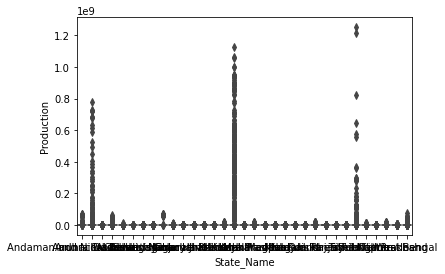

In [11]:
sns.boxplot(x=df["State_Name"],y=df["Production"])

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

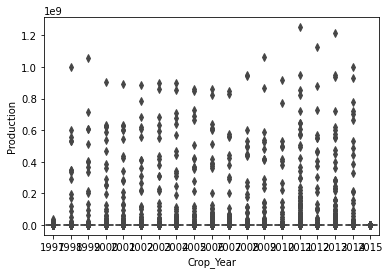

In [12]:
sns.boxplot(x=df["Crop_Year"],y=df["Production"])

<AxesSubplot:xlabel='Season', ylabel='Production'>

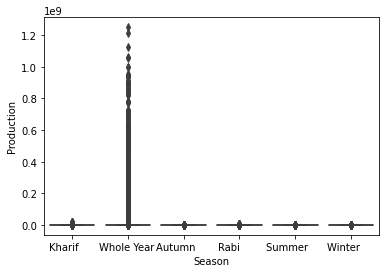

In [13]:
sns.boxplot(x=df["Season"],y=df["Production"])

<AxesSubplot:xlabel='Crop', ylabel='Production'>

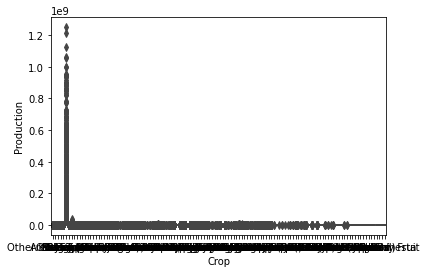

In [14]:
sns.boxplot(x=df["Crop"],y=df["Production"])

<AxesSubplot:>

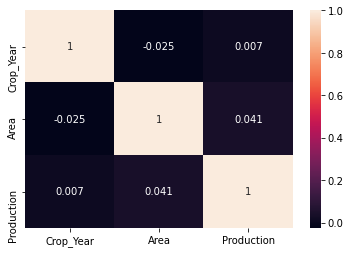

In [15]:
plt.tick_params(labelsize=10)
sns.heatmap(df.corr(),annot=True)

In [16]:
df["State_Name"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

<AxesSubplot:xlabel='Crop_Year'>

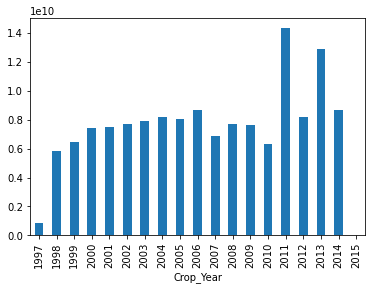

In [17]:
 plt.tick_params(labelsize=10)
df.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

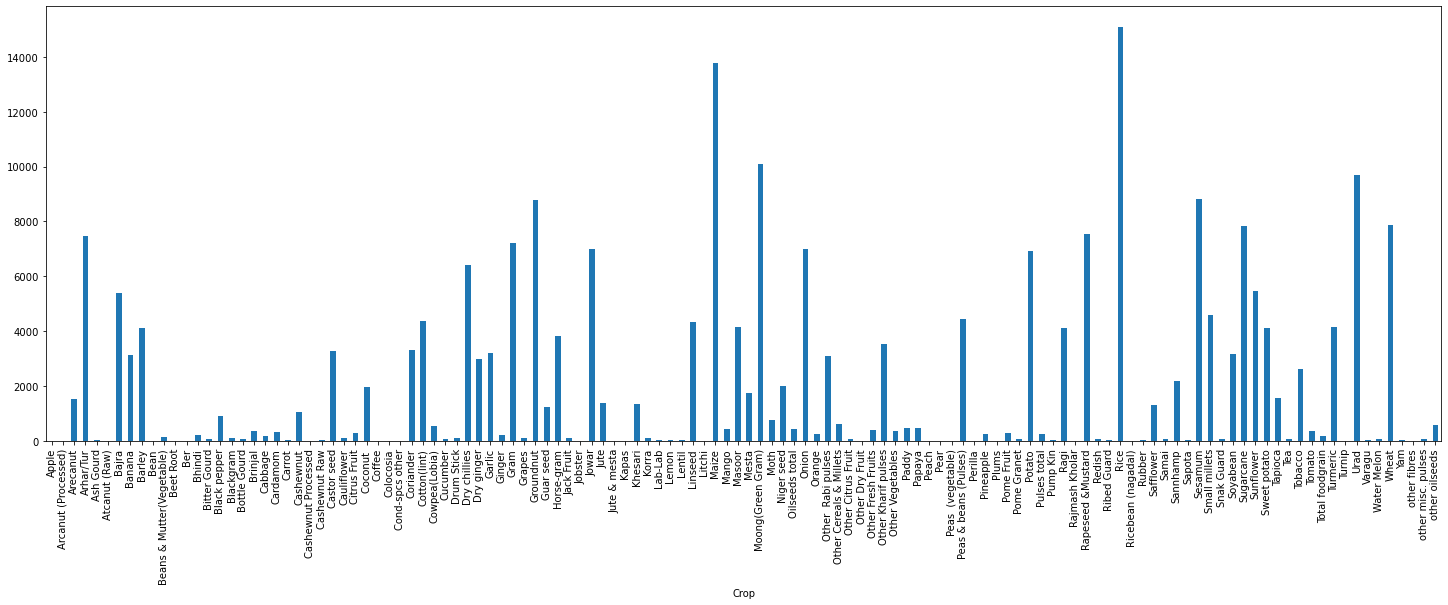

In [18]:
plt.figure(figsize=(25,8))
plt.tick_params(labelsize=10)
df.groupby("Crop")["Production"].agg("count").plot.bar()
plt.show()

In [19]:
cc=df['Crop']
def cat_crop(cc):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar']:
        if cc==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)']:
        if cc==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if cc==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Tapioca','Soyabean','Horse-gram','Gram']:
        if cc==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion']:
        if cc==i:
            return 'Vegetables'
    for i in ['Perilla','Colocosia','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies']:
        if cc==i:
            return 'Species'
    for i in ['Jobster','Cond-spcs other']:
        if cc==i:
            return 'Other'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)']:
        if cc==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if cc==i:
            return 'Nuts'
    for i in ['Rubber']:
        if cc==i:
            return 'Natural Polymer'
    for i in ['Coffee']:
        if cc== i:
            return 'Coffee'
    for i in ['Tea']:
        if cc==i:
            return 'Tea'
    for i in ['Total foodgrain']:
        if cc==i:
            return 'Total foodgrain'
    for i in ['Pulses total']:
        if cc==i:
            return 'Pulses total'
    for i in ['Oilseeds total']:
        if cc==i:
            return 'Oilseeds total'
    for i in ['Paddy']:
        if cc==i:
            return 'Paddy'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum']:
        if cc==i:
            return 'Oilseeds'
    for i in ['Sannhamp']:
        if cc==i:
            return 'Fertile Plant'
    for i in ['Tobacco']:
        if cc==i:
            return 'Commercial'
    for i in ['Sugarcane']:
        if cc==i:
            return 'Sugarcane'

In [20]:
df['cat_crop']=df['Crop'].apply(cat_crop)

In [21]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,cat_crop
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Nuts
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Pulses
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Fruits
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Nuts


In [22]:
df["cat_crop"].value_counts()

Cereal             62607
Pulses             33405
Oilseeds           33375
Species            21631
Vegetables         21559
Beans              17926
Nuts               11472
Sugarcane           7827
fibres              7602
Fruits              6153
Commercial          2637
Fertile Plant       2183
Paddy                479
Oilseeds total       426
Pulses total         266
Total foodgrain      188
Tea                   62
Natural Polymer       29
Other                 27
Coffee                 6
Name: cat_crop, dtype: int64

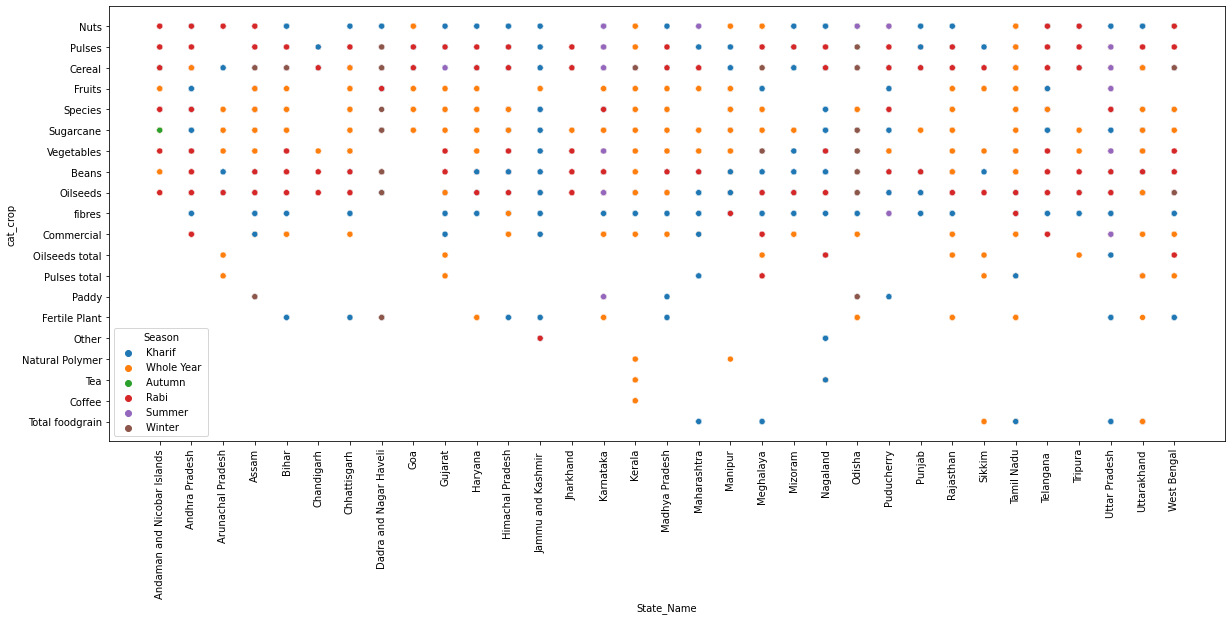

In [23]:
 plt.figure(figsize=(20,8))
 sns.scatterplot(data=df,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
 plt.show()

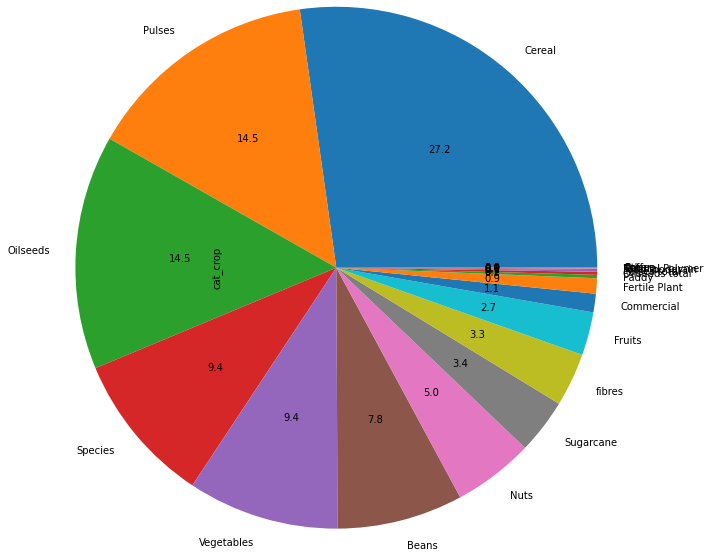

In [24]:
df1=df["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

<AxesSubplot:xlabel='State_Name'>

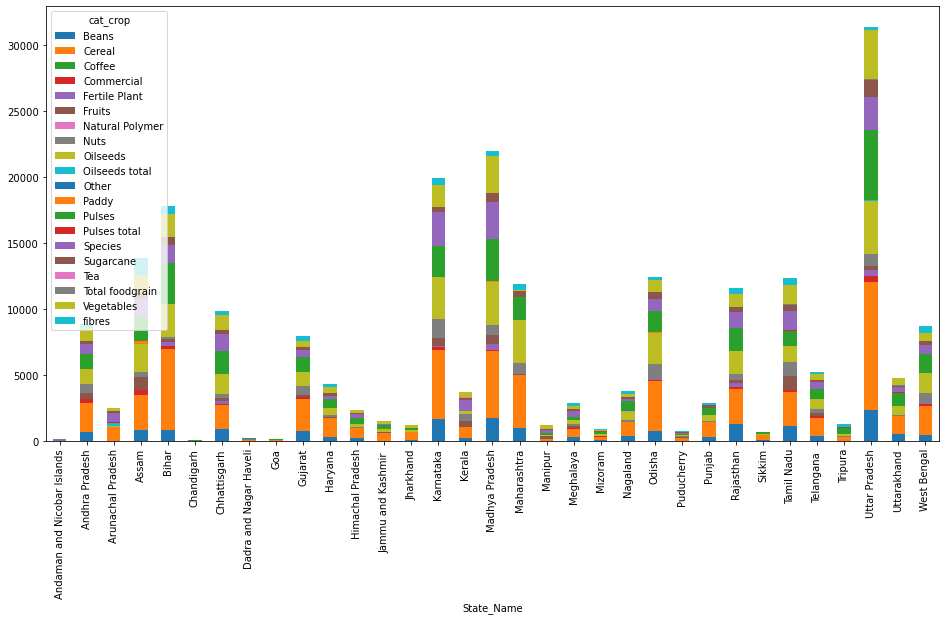

In [25]:
df2 = pd.crosstab(df['State_Name'], df['cat_crop'])
df2.plot(kind='bar', stacked=True, figsize = (16,8))

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
 7   cat_crop       229860 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 20.0+ MB


In [27]:
df.District_Name.nunique()

646